In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

In [2]:
advertDf = pd.read_csv('Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales']) #importing only the columns with column name and not the un-named serial number column
advertDf.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertDf.shape

(200, 4)

Our dataset has only four columns and 200 rows. Here our target variable is 'sales'.

In [4]:
#Dataset summary statistics
advertDf.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#Checking for missing values
advertDf.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

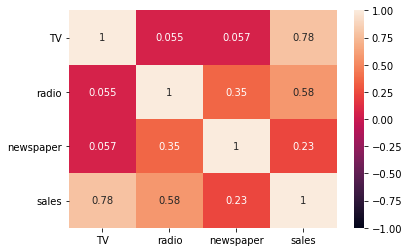

In [6]:
sns.heatmap(advertDf.corr(), vmin = -1, vmax = 1, annot=True)

We see that the sales column is highly correlated with the TV column and lest correlated with the newspaper column. But the sales column is positively correlated to all feature columns

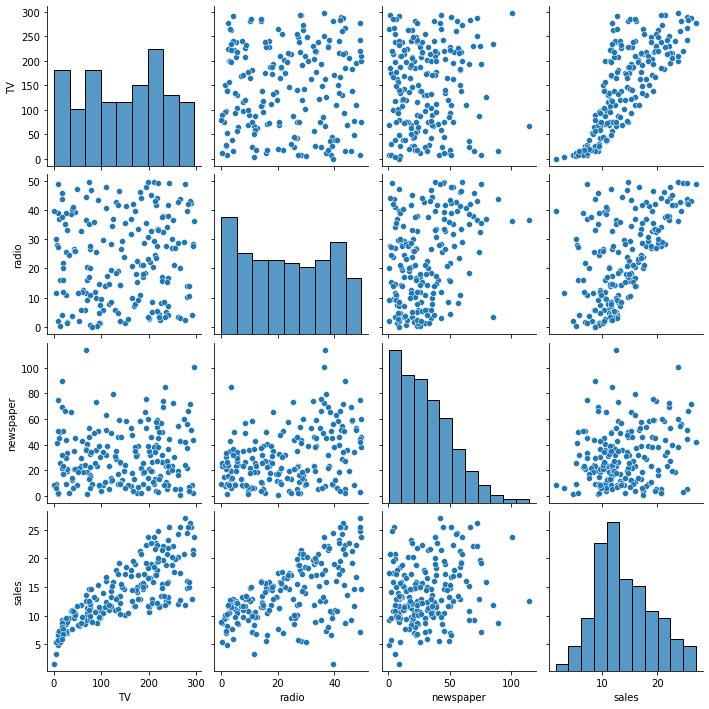

In [7]:
sns.pairplot(advertDf)

The sales column has upwards trend for all features. But the upward trend is more defined for the column TV and Radio

In [8]:
#Making bins for categorising the sales
bins = np.linspace(min(advertDf.sales), max(advertDf.sales), 4)

labels = ['low', 'medium', 'high']

In [9]:
advertDf['sales_cat'] = advertDf['sales']

In [10]:
#This new column is for visualization only and will not be used in model fitting
advertDf['sales_cat'] = pd.cut(advertDf['sales_cat'], bins=bins, labels=labels, include_lowest=True)

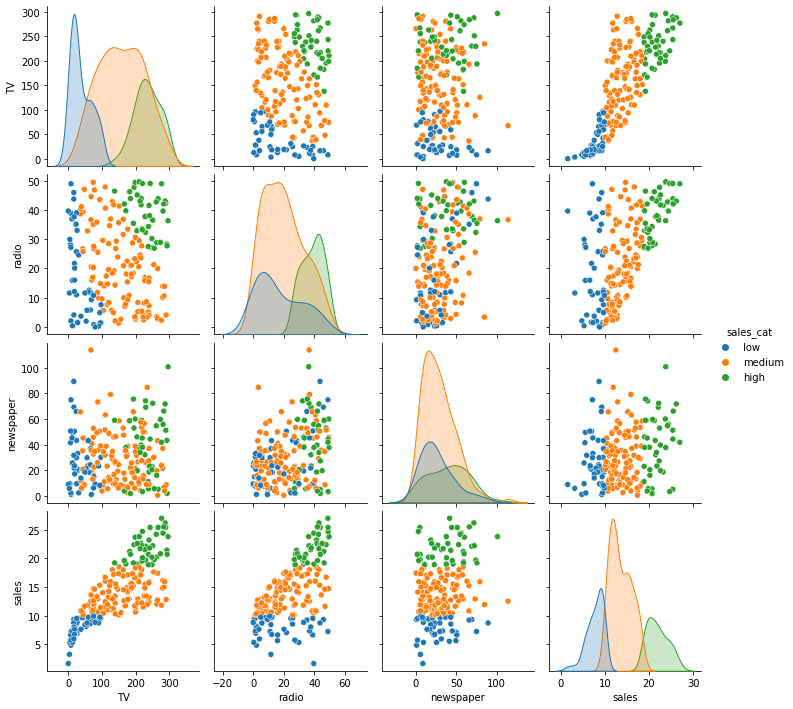

In [11]:
sns.pairplot(advertDf, hue='sales_cat')

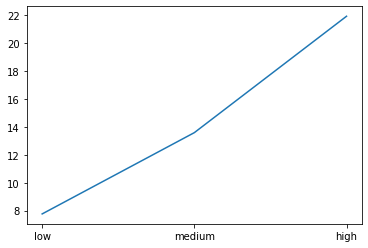

In [12]:
plt.plot(advertDf.groupby('sales_cat')['sales'].mean())

From the above we see that for sales category low, the average sales is 8. For sales category medium and high the mean sales are around 13 and 21 respectively

In [13]:
#checking Skewness
advertDf.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [14]:
#spliting the x and y
x = advertDf.drop(['sales', 'sales_cat'], axis=1)
y = advertDf['sales']

In [15]:
#Removing skewness from newspaper column
x['newspaper'] = advertDf['newspaper']/2

In [16]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [17]:
#Scaling the numeric columns
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=advertDf.drop(['sales', 'sales_cat'], axis=1).columns)

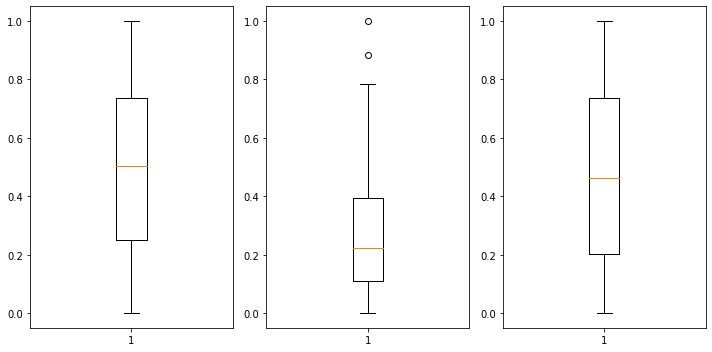

In [18]:
#Checking for outliers
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.boxplot(x['TV'])

plt.subplot(1,3,2)
plt.boxplot(x['newspaper'])

plt.subplot(1,3,3)
plt.boxplot(x['radio'])

plt.tight_layout()
plt.show()

Since no significant outliers plus very less data so we will ignore the outlier

In [19]:
#Finding the best random state
maxAcc = 0
maxRs = 0
for randState in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=randState)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc = lr.score(x_test, y_test)*100
    if acc>maxAcc:
        maxAcc=acc
        maxRs=randState
print(f"Best accuracy is {maxAcc}% on Random state {randState}")

Best accuracy is 95.26769603668497% on Random state 199


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=199)

In [21]:
#Checking various regression algorithms
#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
accLr = lr.score(x_test, y_test)*100
print(f"Linear Regression accuracy is {accLr}%")

Linear Regression accuracy is 85.61258474266575%


In [22]:
#Support Vector Regressor
svr = SVR()
svr.fit(x_train, y_train)
accSvr = svr.score(x_test, y_test)*100
print(f"SVR accuracy is {accSvr}%")

SVR accuracy is 90.71545164330172%


In [23]:
#Support Vector Regressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
accrfr = rfr.score(x_test, y_test)*100
print(f"RFR accuracy is {accrfr}%")

RFR accuracy is 96.54289930908702%


###### Crossvalidation

In [24]:
cvsLr = cross_val_score(lr, x, y, cv=5)
print(f'Cross Validation score for LinearRegression is {cvsLr.mean()*100}')
print(f'Score difference {(lr.score(x_test, y_test)*100)-(cvsLr.mean()*100)}')

Cross Validation score for LinearRegression is 88.71063495438435
Score difference -3.0980502117186006


In [25]:
cvsSvr = cross_val_score(svr, x, y, cv=5)
print(f'Cross Validation score for SVR is {cvsSvr.mean()*100}')
print(f'Score difference {(svr.score(x_test, y_test)*100)-(cvsSvr.mean()*100)}')

Cross Validation score for SVR is 92.39226132493222
Score difference -1.6768096816305018


In [26]:
cvsrfr = cross_val_score(rfr, x, y, cv=5)
print(f'Cross Validation score for RFR is {cvsrfr.mean()*100}')
print(f'Score difference {(rfr.score(x_test, y_test)*100)-(cvsrfr.mean()*100)}')

Cross Validation score for RFR is 97.64142351932146
Score difference -1.0985242102344444


In this case, I will perform hyperparameter tuning for all the models and choose the one which has the highest test accuracy after tuning.

###### Hyper  Parameter Tuning

In [27]:
# Random Forest Hyper Parameter Tuning
parameterRfr = {'n_estimators': [10, 50, 150, 200, 500, 1000],
               'criterion': ['mae'],
               'max_features' : ['sqrt', 'log2'],
                'bootstrap': ['False']}

gs = GridSearchCV(rfr, param_grid = parameterRfr, cv = 5)

gs.fit(x_train, y_train)

gs.best_params_

rfr = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', criterion = 'mae', bootstrap = False)

rfr.fit(x_train, y_train)

rfr.score(x_test, y_test)*100

92.99392980482885

In [28]:
#Linear Regression Hyper Parameter Tuning
parameterlr = {'fit_intercept': ['False', 'True'], 'normalize': ['True', 'False']}

gs1 = GridSearchCV(lr, param_grid = parameterlr, cv = 5)

gs1.fit(x_train, y_train)

gs1.best_params_

lr = LinearRegression(fit_intercept = False, normalize = True)
lr.fit(x_train, y_train)

lr.score(x_test, y_test)

0.7685473055742027

In [29]:
#SVR Hyper Parameter Tuning
parametersSvr = {'gamma': ['auto'], 'C': [0.1, 1, 10, 100, 1000]}

gs2 = GridSearchCV(svr, param_grid = parametersSvr, cv = 5)

gs2.fit(x_train, y_train)

gs2.best_params_

svr = SVR(C = 1000, gamma = 'auto')
svr.fit(x_train, y_train)

svr.score(x_test, y_test)

0.9677748318493071

Since SVR has the highest accuracy after Hyper Parameter Tuning, I will choose this as the final model
###### Saving the model

In [30]:
import joblib

In [31]:
joblib.dump(svr, 'advert.pkl')
#Checking the model
model = joblib.load('advert.pkl')
model.predict(x_test)

array([17.3639565 , 15.50731216, 13.02954699, 10.48440189, 12.84900976,
       21.94887027, 18.24420037,  9.32577468,  9.36640422, 17.20215408,
       11.46777277,  9.20238374, 19.82913282, 11.61645319, 12.79545338,
       12.30056995, 15.72593765, 19.22133341, 10.28818424, 13.72575944,
       11.95812368,  6.55444417, 21.25328544, 11.06548852, 12.46175218,
       27.23210092,  9.40671883, 12.18983609, 10.53251799, 12.8070941 ,
       21.37764445,  6.92431157, 14.83785242, 17.66324365,  6.04045511,
        9.83520526,  9.75653996, 16.30001548,  6.58021253, 10.65371455])